# SSCx Circuit Analyses

We analyze rat somatosensory circuits build under the SSCx-Dissemination project (2019-2020).

# Introduction

We will use DMT, our analysis framework. With DMT we strive to provide a 
framework to analyze composition and connectome phenomena of a brain-circuit,
that keeps the scientific aspect of the analysis apart from the engineering 
details of the circuit model.

Lets begin by importing the required libraries, and setting up the circuits to study.

In [1]:
#essential imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from dmt.tk.phenomenon import Phenomenon
from dmt.tk.parameters import Parameters
from dmt.tk.plotting import Bars, LinePlot, HeatMap
from neuro_dmt import terminology
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import CompositionAnalysesSuite
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.connectome\
    import ConnectomeAnalysesSuite
from neuro_dmt.models.bluebrain.circuit.atlas import\
    BlueBrainCircuitAtlas
from neuro_dmt.models.bluebrain.circuit.model import\
    BlueBrainCircuitModel,\
    CircuitProvenance
from neuro_dmt.models.bluebrain.circuit.adapter import\
    BlueBrainCircuitAdapter
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import PathwayMeasurement
from neuro_dmt.analysis.circuit import BrainCircuitAnalysis

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


## Paths to the circuits.

We set paths to the circuits to analyze.

In [2]:
#paths to circuits
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")
atlas_bio_m =\
    BlueBrainCircuitAtlas(
        path=os.path.join(
                atlases_sscx_diss, "P14-MEAN"))
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")
circuit_bio_m =\
    BlueBrainCircuitModel(
        path_circuit_data=path_bio_m,
            provenance=CircuitProvenance(
                label="SSCxRatDisseminationBioM",
                authors=["BBP Team"],
                release_date="20191212",
                uri=path_bio_m,
                animal="Wistar Rat",
                age="P14",
                brain_region="SSCx"))
adapter =\
    BlueBrainCircuitAdapter()
suite_connectome_analyses =\
    ConnectomeAnalysesSuite(
        sample_size=20)

In [5]:
adapter.get_provenance(circuit_bio_m)

{'age': 'P14',
 'animal': 'Wistar Rat',
 'authors': ['BBP Team'],
 'brain_region': 'SSCx',
 'date_release': 'YYYYMMDD',
 'label': 'SSCxRatDisseminationBioM',
 'uri': '/gpfs/bbp.cscs.ch/project/proj83/circuits/Bio_M/20191206'}

## Mock Circuit

For facilitate development of analyses and the associated adapter, we will use
a mock circuit that behaves the same as a circuit loaded via BluePy.

In [3]:
#mock circuit
from neuro_dmt.models.bluebrain.circuit.mock.circuit import\
    MockCircuit
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity

bluepy_mock_circuit =\
    MockCircuit.build(
        circuit_composition,
        circuit_connectivity)
mock_circuit_model =\
    BlueBrainCircuitModel(
        bluepy_mock_circuit,
        label="BlueBrainCircuitModelMockLight")

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-20 15:47:28>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	136
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 2
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-20 15:47:28>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	136
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 3
with number of excitatory mtypes: 1

test develop mock circuit Logger                                    

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-20 15:47:28>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 5
with number of excitatory mtypes: 3

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-20 15:47:28>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 5
with number of excitatory mtypes: 3

test develop mock circuit Logger                    

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-20 15:47:28>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-20 15:47:28>                                                 
Traceback:
	filename: 	/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                    

45it [00:00, 447.85it/s]

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/models/bluebrain/circuit/mock/builder.py Logger
DEBUGINFO@<2020-02-20 15:47:28>                                                 
Build the (mock) circuit connectome.



82304it [02:42, 506.03it/s]
100%|██████████| 82304/82304 [01:08<00:00, 1201.07it/s]


# Connectome Phenomena

We will analyze the connectome of a brain circuit as a directed network.
The nodes in this network, *i.e.* the cells in the circuit, have properties, 
and we must know the distribution of these nodes. Physical distributions (
such as over $X, Y, Z$ coordinates, or by region and layer) will be studied as 
composition analyses. For connectome analyses we consider distribution of 
cell counts as a function of *mtype*. 

In [3]:
from abc import abstractmethod
from dmt.tk.collections import get_list, take
from dmt.tk.field import ABCWithFields, Field, lazyfield

def head(xs):
    return list(take(xs, 1))[0]
        
class StatisticalMeasurement(ABCWithFields):
    """
    An abstract base class to make statistical measurements.
    """
    value = Field(
        """
        Measurement method for a single set of parameter-values.
        """)
    variable = Field(
        """
        Name to give the measured phenomenon.
        """)
    sampling_methodology = Field(
        """
        Random or exhaustive?
        """,
        __default_value__=terminology.sampling_methodology.random)
    sample_size = Field(
        """
        Number of indiciduals in a sample.
        """,
        __default_value__=20)
    summaries = Field(
        """
        Summaries required, if making a summary measurement.
        """,
        __default_value__=["size", "count", "sum", "mean", "std"])
    
    @abstractmethod
    def sample(self, *args, **kwargs):
        """
        Measure a phenomenon (provided by value of `Field value`)
        on a sample of parameter-sets...
        """
        raise NotImplementedError
        
        
    def sample_one(self, *args, **kwargs):
        """..."""
        if self.sampling_methodology != terminology.sampling_methodology.random:
            raise TypeError(
                """
                A single size sample makes sense only when sampling randomly.
                This instance of {} was set to
                \t `sampling_methodology {}`.
                """.format(
                    self.__class__.__name__,
                    self.sampling_methodology))
                
        return head(self.sample(*args, **kwargs))
    
    def collect(self, *args, **kwargs):
        """..."""
        sample =[
            m for m in self.sample(*args, **kwargs)]
        try:
            return pd.concat(sample, axis=1)
        except TypeError:
            return pd.Series(sample, name=self.variable)
        
    @lazyfield
    def aggregators(self):
        listed_aggregators =\
            get_list(self.summaries)
        return\
            listed_aggregators[0] if len(listed_aggregators) == 1\
                else listed_aggregators
        
    def summary(self, *args, **kwargs):
        collection = self.collect(*args, **kwargs)
        try:
            return collection.agg(self.aggregators, axis=1)
        except ValueError:
            return collection.agg(self.aggregators)
    
    
    
class CellMeasurement(StatisticalMeasurement):
    """
    ...
    """
    
    def _get_cells(self, cell_type, circuit_model, adapter):
        """..."""
        all_cells =\
            adapter.get_cells(circuit_model, **cell_type)
        sampling_random =\
            self.sampling_methodology == terminology.sampling_methodology.random
        return\
            all_cells.sample(self.sample_size)\
            if sampling_random and self.sample_size < all_cells.shape[0]\
                else all_cells
    
        
    def sample(self, circuit_model, adapter, cell_type, **kwargs):
        """..."""
        try:
            sampling_methodology = kwargs.pop("sampling_methodology")
        except KeyError:
            sampling_methodology = None
            
        if (sampling_methodology and
            sampling_methodolgy != self.sampling_methodology):
            LOGGER.warn(
                """
                Argument `sampling_methodology` will be dropped.
                A sampling methodology of {} was defined for this instance
                of {} computing phenomenon {}.
                `.sample(...)` was called with sampling methodology {}.
                """.format(
                    self.sampling_methodology,
                    self.__class__.__name__,
                    self.method.__name__,
                    sampling_methodology,))
        cells =\
            self._get_cells(cell_type, circuit_model, adapter)
        for _, cell in cells.iterrows():
            try:
                measured_value = self.value(cell)
            except TypeError:
                measured_value = cell[self.variable]
            
            yield measured_value


In [4]:
count_cells_mtype =\
    CellMeasurement(
        value=lambda cell: 1.,
        variable="count_cells",
        sampling_methodology=terminology.sampling_methodology.exhaustive,
        summaries="sum")

In [5]:
adapter.get_cells(circuit_bio_m).head()

,x,y,z,orientation,etype,exc_mini_frequency,inh_mini_frequency,layer,me_combo,morph_class,morphology,mtype,region,synapse_class,gid
1,3757.507408,-1953.543622,-1191.735597,"[[0.8601262241273964, 0.4717481052436997, -0.1...",cNAC,0.63,0.012,1,cNAC_L4CHC_L1_DAC_1_sm080529a1-5_idA_-_Scale_x...,INT,sm080529a1-5_idA_-_Scale_x1.000_y1.025_z1.000,L1_DAC,S1FL,INH,1
2,4081.068844,-2356.584318,-1477.440520,"[[0.6723165489045267, 0.6225264467952709, 0.40...",cNAC,0.63,0.012,1,cNAC_L23NGC_L1_DAC_1_sm080625a1-6_idD_-_Scale_...,INT,sm080625a1-6_idD_-_Scale_x1.000_y1.050_z1.000,L1_DAC,S1FL,INH,2
3,3877.006479,-2137.510644,-1286.660227,"[[0.8337878151933951, 0.5520514581902204, -0.0...",bNAC,0.63,0.012,1,bNAC_L23NGC_L1_DAC_1_C270106C_-_Scale_x1.000_y...,INT,C270106C_-_Scale_x1.000_y0.950_z1.000_-_Clone_0,L1_DAC,S1FL,INH,3
4,3716.561525,1784.819331,-931.367146,"[[0.891350442678013, 0.3678302701369189, -0.26...",bNAC,0.63,0.012,1,bNAC_L23SBC_L1_DAC_1_C270106A_-_Scale_x1.000_y...,INT,C270106A_-_Scale_x1.000_y1.050_z1.000,L1_DAC,S1Sh,INH,4
5,3957.976882,-1081.761457,-1274.484457,"[[0.8254327515346845, 0.4811655563165434, 0.29...",bNAC,0.63,0.012,1,bNAC_L23NGC_L1_DAC_1_sm080930a1-5_idC_-_Scale_...,INT,sm080930a1-5_idC_-_Scale_x1.000_y1.025_z1.000,L1_DAC,S1FL,INH,5


## Count of cells by mtype.

Pathways mtype --> mtype are the most interesting. We can investigate the number
of cells of a given mtype in a circuit.

100%|██████████| 60/60 [00:05<00:00, 11.32it/s]


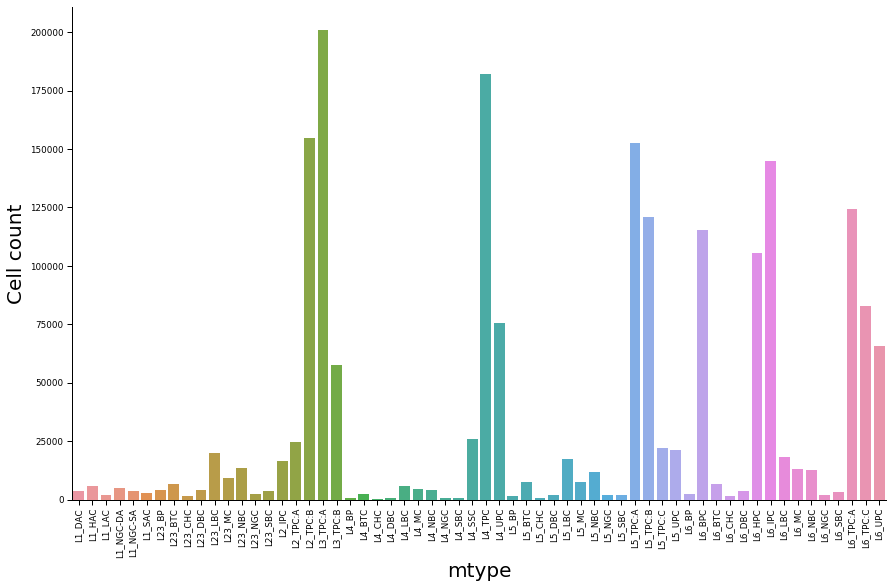

In [8]:
phenomenon_count_cells_by_mtype =\
    Phenomenon(
        "Cell count",
        "Number of cells.",
        group="Composition")

def get_cell_count(circuit, adapter,
                   sampling_methodology=terminology.sampling_methodology.exhaustive,
                   **query):
    return adapter.get_cells(circuit, **query).shape[0]

parameters_mtypes =\
    Parameters(
        lambda adapter, circuit: (
            {"mtype": mtype} for mtype in adapter.get_mtypes(circuit)),
        size=1)
    
analysis_cell_count_mtype =\
    BrainCircuitAnalysis(
        introduction="""
        Here we analyze distribution of cells by mtype in a brain circuit mode.
        """,
        methods="""
        Cells in a circuit were grouped by their mtype and counted.
        """,
        phenomenon=phenomenon_count_cells_by_mtype,
        AdapterInterface=suite_connectome_analyses.AdapterInterface,
        measurement_parameters=parameters_mtypes,
        sample_measurement=get_cell_count,
        plotter=Bars(
            xvar="mtype",
            xlabel="mtype",
            yvar="cell_count",
            ylabel="Cell count",
            order="mtype"))

report_cell_count_mtype =\
    analysis_cell_count_mtype(circuit_bio_m, adapter)

## Afferent degree of cells, by mtype.

We investigate total incoming connections (*i.e.* connections afferent on a cell).

In [11]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import PathwayMeasurement

measurement_afferent_degree =\
    PathwayMeasurement(
        value=lambda connection: np.ones(connections.shape[0]),
        variable="degree_afferent",
        direction="AFF",
        by_soma_distance=False,
        sampling_methodology=terminology.sampling_methodology.random
    ).sample_one

analysis_degree_afferent =\
    BrainCircuitAnalysis(
        phenomenon=Phenomenon(
            "Afferent Degree",
            "Number of incoming connections of a cell.",
            group="Connectome"),
        introduction="""
        Afferent degree of cells, grouped by their mtype.
        """,
        methods="""
        Afferent degree was measured for cells of a given mtype.
        """,
        measurement_parameters=Parameters(
            lambda adapter, circuit: (
                {"post_synaptic_cell": {"mtype": mtype}}
                for mtype in adapter.get_mtypes(circuit)),
                size=1),
        sample_measurement=measurement_afferent_degree,
        plotter=Bars(
            xvar="mtype",
            xlabel="mtype",
            yvar="afferent_degree",
            order="mtype"))

analysis_degree_afferent(circuit_bio_m, adapter)

  0%|          | 0/60 [00:00<?, ?it/s]

TypeError: 
                            sample_measurement(...) failed with arguments
                            (model, adapter) and (adapter, model):
                            	 'PathwayMeasurement' object has no attribute 'method'
                            	 'PathwayMeasurement' object has no attribute 'method'
                            

In [ ]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.tools\
    import PathwayMeasurement

measurement_efferent_degree =\
    PathwayMeasurement(
        value=lambda connection: np.ones(connections.shape[0]),
        variable="degree_efferent",
        direction="EFF",
        by_soma_distance=False,
        sampling_methodology=terminology.sampling_methodology.random
    ).sample_one

analysis_degree_afferent =\
    BrainCircuitAnalysis(
        phenomenon=Phenomenon(
            "Efferent Degree",
            "Number of outgoing connections of a cell.",
            group="Connectome"),
        introduction="""
        Efferent degree of cells, grouped by their mtype.
        """,
        methods="""
        Efferent degree was measured for cells of a given mtype.
        """,
        measurement_parameters=Parameters(
            lambda adapter, circuit: (
                {"pre_synaptic_cell": {"mtype": mtype}}
                for mtype in adapter.get_mtypes(circuit)),
                size=1),
        sample_measurement=measurement_afferent_degree,
        plotter=Bars(
            xvar=("pre_synaptic_cell", "mtype"),
            xlabel="mtype",
            yvar="efferent_degree",
            order=("pre_synaptic_cell", "mtype")))

report_degree_efferent =\
    analysis_degree_efferent(circuit_bio_m, adapter)